# Diabetes
This data set contains 768 records, 8 attributes, 268 positive results for diabetes test and 500 negative result. All patients were females at least 21 years old.

* Pregnancies -- Number of times pregnant
* Glucose -- Plasma glucose concentration at 2 hours in an oral glucose tolerance test
* BloodPressure -- Diastolic blood pressure (MMHG)
* SkinThickness -- Triceps skin fold thickness (mm)
* Insulin -- 2-Hour serum insulin (mu U/ml)
* BMI -- Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction -- diabetes pedigree function
* Age -- in years
* outcome -- 1 true 0 false

In [5]:
# read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection, preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
pd_df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/project/diabetes.csv')

pd_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# check if there is null value in each attribute

pd_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null value exists. No need to impute or to drop any null value.

In [24]:
# check if unique value in each column
pd_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

So there is no third unique value in outcome column.

In [16]:
# show stats
pd_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It is weird that some columns have 0 as the min value.

In [19]:
corr_val = pd_df.corr()
corr_val


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

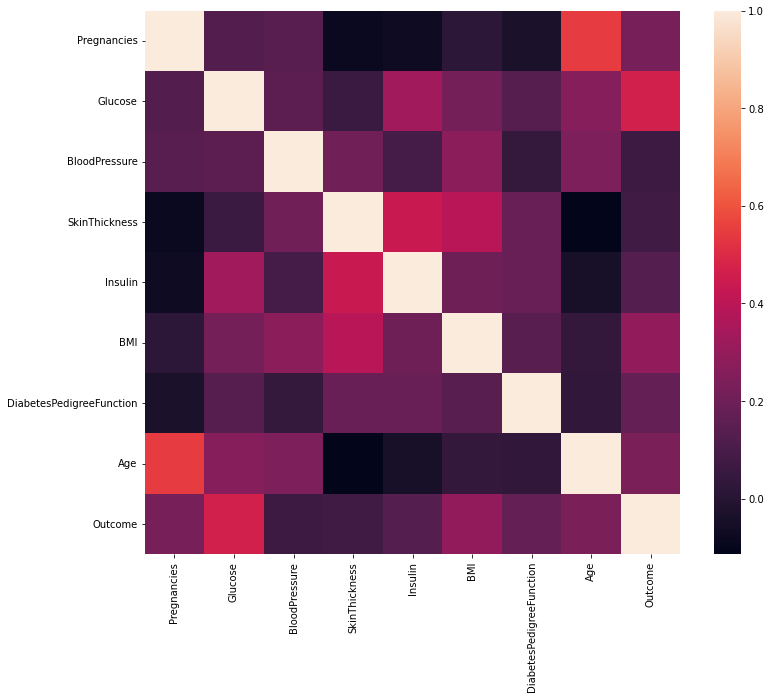

In [18]:
# show correlation matrix
plt.figure(figsize=(12,10))

sns.heatmap(data = corr_val)


 Note from the above graph that outcome and glucose are related,but not strongly related. Rest does not seem related.

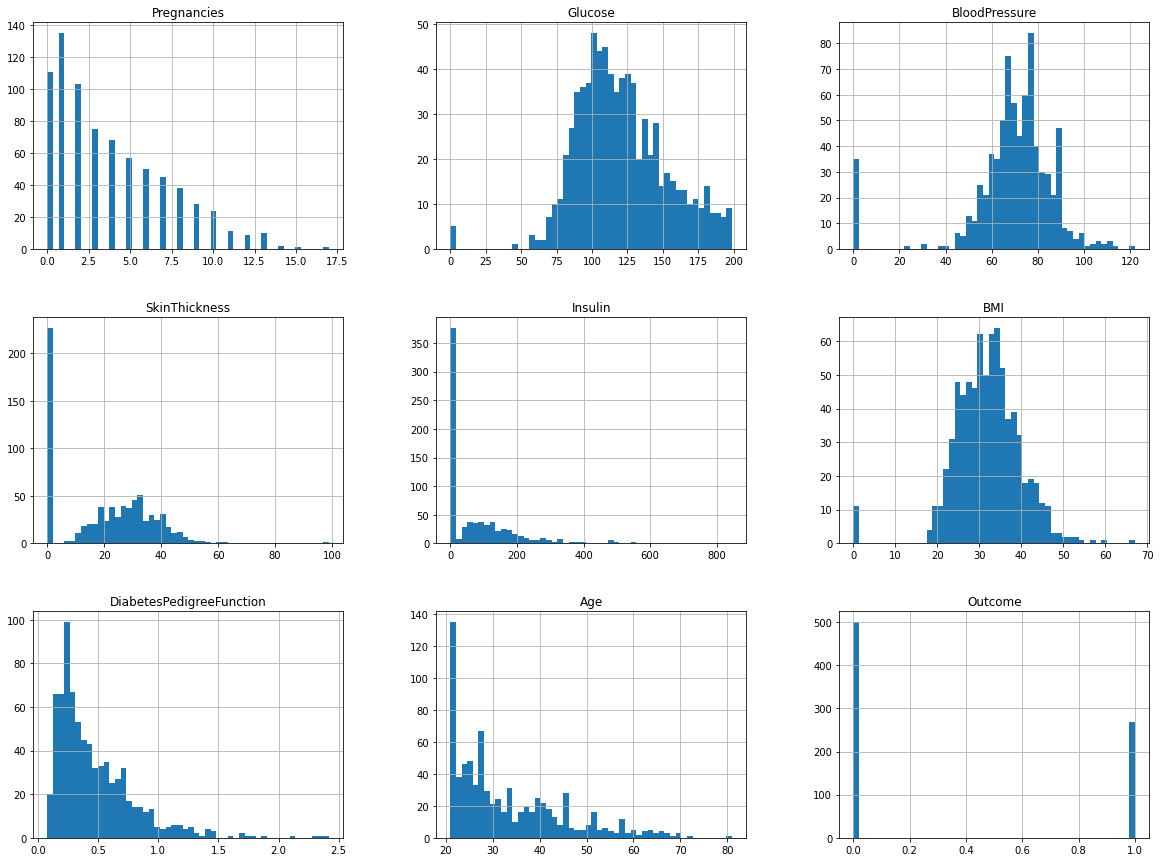

In [22]:
# create histgram for each attributes
pd_df.hist(bins=50,figsize=(20,15))
plt.show()

In blood pressure graph, bmi graph, and skin thickness graph there were  some outliers. The pregnancies graph shows that a person had been pregnant 17 times, and about 110 people have not been pregnant yet. It is so weird that a person has 0 glucose, which does not make any sense.

In [29]:
def change_size():
    plt.figure(figsize=(13,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc65050c9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc65050cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc65050c7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc65051b4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc65051b7c0>],
 'means': []}

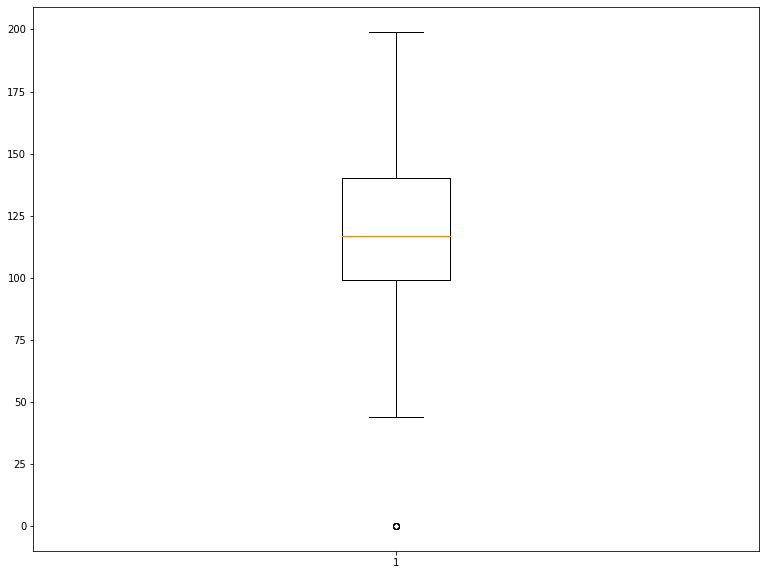

In [26]:
# use boxplot to see outliers
change_size()
plt.boxplot(pd_df['Glucose'])


Note from above boxplot graph there is one outlier rest are in range. And its median is around 115.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc650615a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc650615fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc650615760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc65059c5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc65059c880>],
 'means': []}

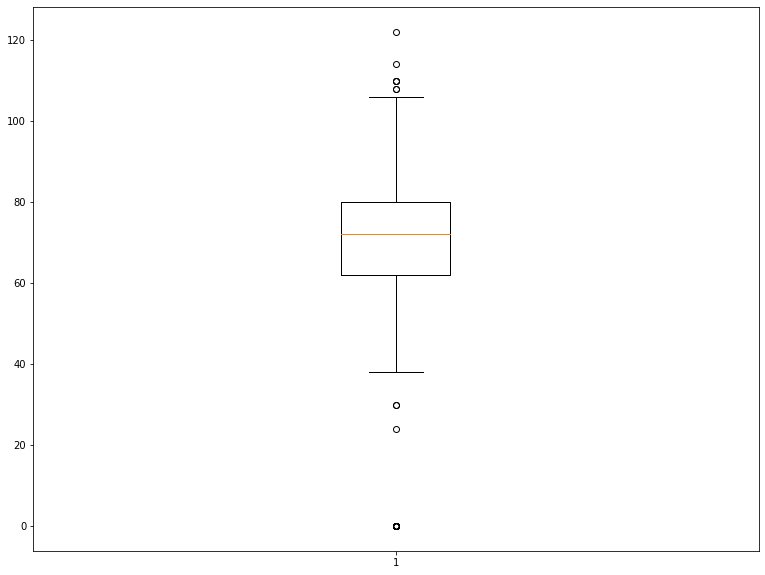

In [30]:
# use boxplot to see outlier in blood pressure column
change_size()
plt.boxplot(pd_df['BloodPressure'])

It seems there are 7 different outliers, but 0 blood pressure does not make any sense. Going to drop row with 0 blood pressure.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc65061ca30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc65061cfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc65061c760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6506285b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc650628880>],
 'means': []}

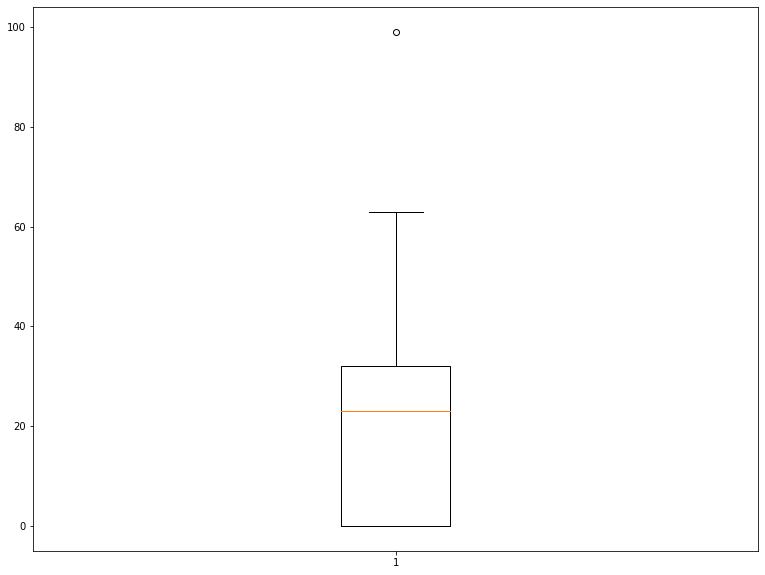

In [31]:
# show boxplot of skin thickness
change_size()
plt.boxplot(pd_df['SkinThickness'])

Note from above boxplot that tells only one outlier. going to drop it.